### Potential Energy/ Potential Function and MALA

Potential Energy - $U(\theta)$ \
Potential Function - $p(\theta)$ 

Define, 

$U(\theta) = -log(p(\theta))$

So,

p($\theta$) = $e^{-U(\theta)}$


**Metropolis-Adjusted Langevin Algorithm (MALA)** explanation 

---

### 🧠 **Background**  
MALA combines **Metropolis-Hastings (MH)** and **Langevin dynamics**. It uses the gradient of the log posterior (or log of the target distribution) to make more informed proposals, improving efficiency over random-walk proposals.

We are sampling from a target distribution:

$$
\pi(x) \propto \exp(-U(x))
$$

Where:
- $\pi(x)$ is the (unnormalized) target density.
- $U(x) = -\log \pi(x)$ is the **potential energy**.

---

### 🔁 **Algorithm sigmas**

#### **1. Initialization**
Choose:
- Initial position: $x_0$
- sigma size: $\epsilon$
- Number of iterations: $N$

---

#### **2. Proposal sigma (Langevin dynamics)**

At iteration $t$, given current $x_t$, propose a new point $x'$ using:

$$
x' = x_t - \frac{\epsilon^2}{2} \nabla U(x_t) + \epsilon \cdot \eta
$$

where:
- $\nabla U(x_t) = -\nabla \log \pi(x_t)$
- $\eta \sim \mathcal{N}(0, I)$ is standard Gaussian noise

This is a discretization of Langevin dynamics.

---

#### **3. Proposal Density (Asymmetric)**

The proposal distribution is:

$$
q(x' \mid x_t) = \mathcal{N}\left(x' \mid x_t - \frac{\epsilon^2}{2} \nabla U(x_t), \epsilon^2 I\right)
$$

$$
q(x_t \mid x') = \mathcal{N}\left(x_t \mid x' - \frac{\epsilon^2}{2} \nabla U(x'), \epsilon^2 I\right)
$$

---

#### **4. Metropolis-Hastings Acceptance Ratio**

Compute the acceptance probability:

$$
\alpha = \min\left(1, \frac{\pi(x') \cdot q(x_t \mid x')}{\pi(x_t) \cdot q(x' \mid x_t)}\right)
$$

Since $\pi(x) \propto \exp(-U(x))$, the ratio becomes:

$$
\alpha = \min\left(1, \frac{\exp(-U(x')) \cdot q(x_t \mid x')}{\exp(-U(x_t)) \cdot q(x' \mid x_t)}\right)
$$

---

#### **5. Accept/Reject**

With probability $\alpha$, accept $x'$, otherwise keep $x_t$:

$$
x_{t+1} = 
\begin{cases}
x' & \text{with probability } \alpha \\
x_t & \text{otherwise}
\end{cases}
$$

---

### ✅ Summary of MALA Update

**Input:** $x_t$  
**Output:** $x_{t+1}$

1. Compute gradient:  
   $\nabla U(x_t)$

2. Propose:  
   $x' = x_t - \frac{\epsilon^2}{2} \nabla U(x_t) + \epsilon \cdot \eta$

3. Compute acceptance ratio $\alpha$

4. Accept $x'$ with probability $\alpha$

---

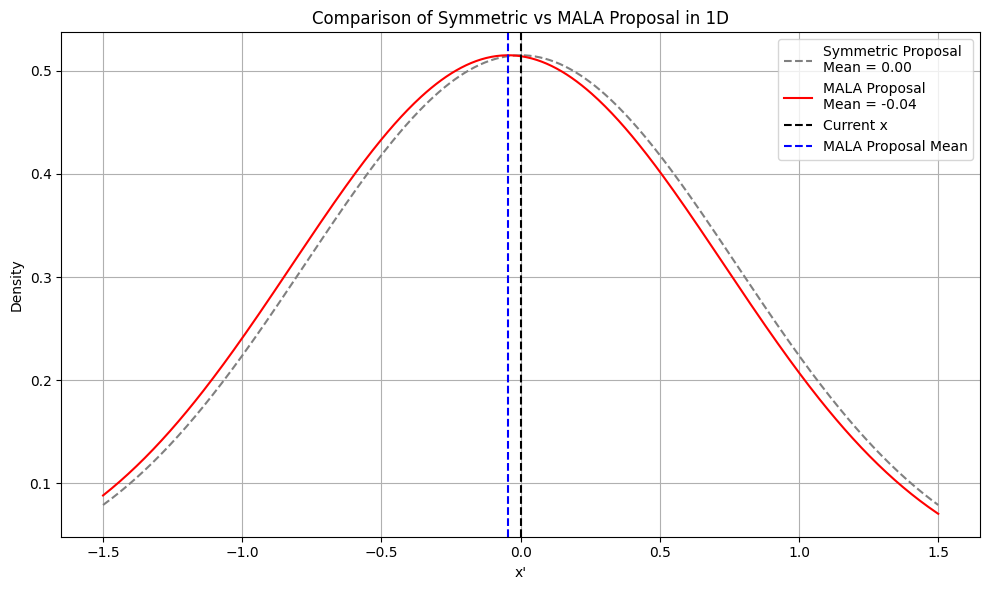

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
x = 0.0                      # Current position
grad_U = 1.0                # Gradient of potential at x (example value)
epsilon = 0.3               # sigma size
sigma = epsilon

# MALA proposal (asymmetric)
mean_mala = x - 0.5 * sigma**2 * grad_U
std_mala = np.sqrt(2 * sigma)

# Symmetric proposal (Random Walk Metropolis)
mean_symmetric = x
std_symmetric = std_mala  # Same variance for comparison

# Generate x-axis values
x_vals = np.linspace(-1.5, 1.5, 500)

# Compute PDF values
pdf_mala = norm.pdf(x_vals, loc=mean_mala, scale=std_mala)
pdf_sym = norm.pdf(x_vals, loc=mean_symmetric, scale=std_symmetric)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_vals, pdf_sym, label="Symmetric Proposal\nMean = 0.00", color='gray', linestyle='--')
plt.plot(x_vals, pdf_mala, label=f"MALA Proposal\nMean = {mean_mala:.2f}", color='red')
plt.axvline(x, color='black', linestyle='--', label='Current x')
plt.axvline(mean_mala, color='blue', linestyle='--', label='MALA Proposal Mean')
plt.title("Comparison of Symmetric vs MALA Proposal in 1D")
plt.xlabel("x'")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Potential

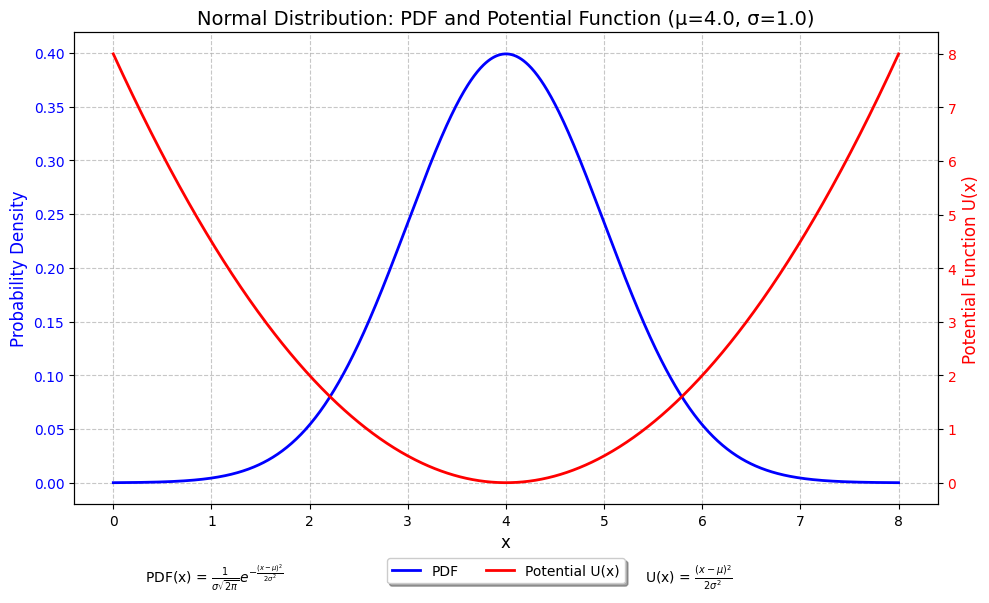

In [114]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma):
    """Calculate the normal probability density function."""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def potential_function(x, mu, sigma):
    """Calculate the potential function U(x) = (x-μ)²/(2σ²)."""
    return ((x - mu) ** 2) / (2 * sigma ** 2)

# Fixed parameters
mu = 4.0  # Mean
sigma = 1.0  # Standard deviation

# Generate x values
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# Calculate PDF and potential function
pdf_values = normal_pdf(x, mu, sigma)
potential_values = potential_function(x, mu, sigma)

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF on the left y-axis
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Probability Density', color='blue', fontsize=12)
ax1.plot(x, pdf_values, 'b-', linewidth=2, label='PDF')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the potential function
ax2 = ax1.twinx()
ax2.set_ylabel('Potential Function U(x)', color='red', fontsize=12)
ax2.plot(x, potential_values, 'r-', linewidth=2, label='Potential U(x)')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title(f'Normal Distribution: PDF and Potential Function (μ={mu}, σ={sigma})', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fancybox=True, shadow=True)

# Add formula annotations
plt.figtext(0.15, 0.02, r'PDF(x) = $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$', fontsize=10)
plt.figtext(0.65, 0.02, r'U(x) = $\frac{(x-\mu)^2}{2\sigma^2}$', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for formula annotations
plt.savefig('normal_distribution_potential.png', dpi=300, bbox_inches='tight')
plt.show()

Potential function is the negative of the probability density function. In above equation, we have defined the potential energy function as the negative of the probability density function. While doing that we have dropped the constant term. The constant term is not important in the context of MALA.

In optimization and machine learning contexts, we go against (opposite direction of) the gradient of the potential function because. Seeking minimum energy: The potential function U(x) represents an "energy landscape" where lower values are more favorable states (higher probability regions in a distribution). The gradient points in the direction of steepest increase, so moving against it leads us to lower energy states.


Assignment

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [17]:
def target_function(x): 
    return np.exp(-(x**2 * (x**2 - 1)))

x = np.linspace(-2, 2, 1000)
y = target_function(x)

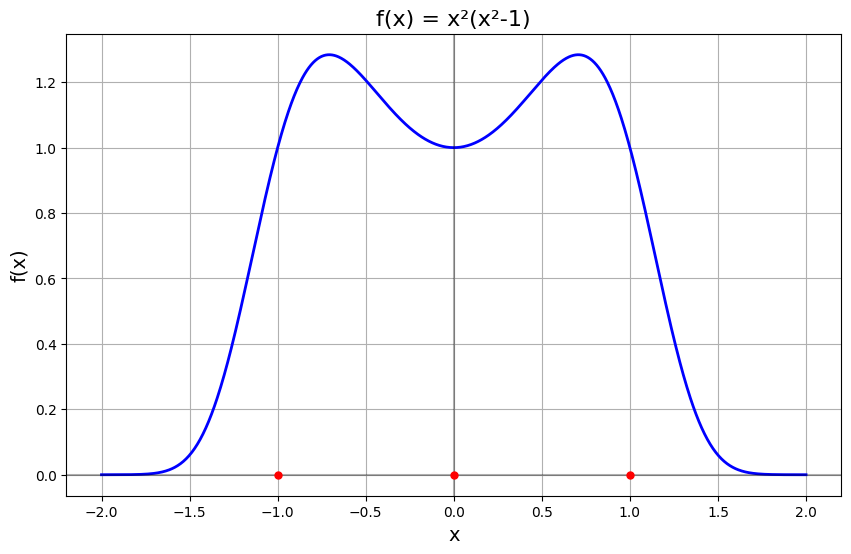

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2)
plt.grid(True)
plt.title('f(x) = x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

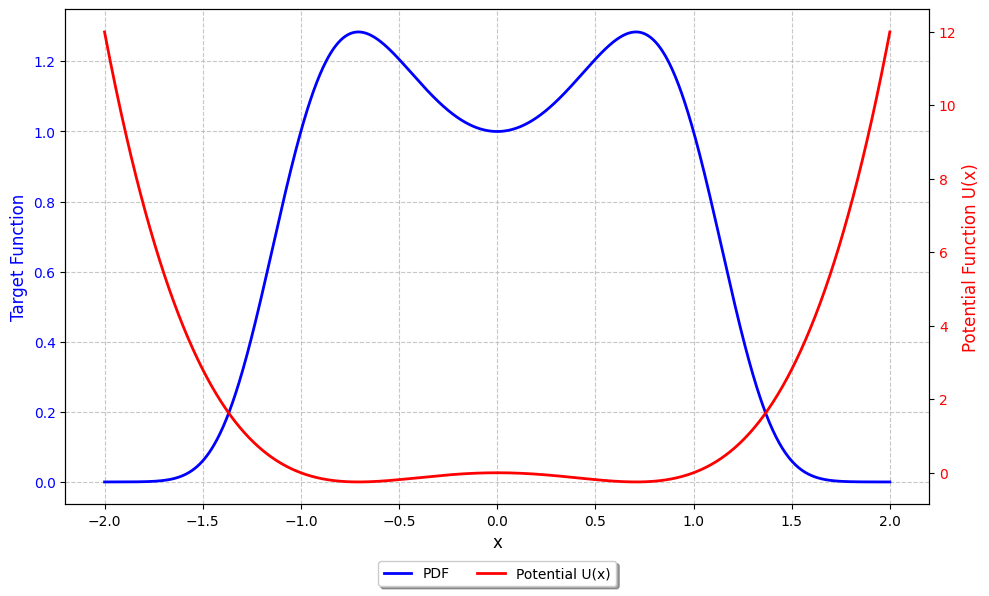

In [19]:
def target_function(x): 
    return np.exp(-(x**2 * (x**2 - 1)))

def potential_function(x): # Potential function
    return -np.log(target_function(x))

# Calculate PDF and potential function
x = np.linspace(-2, 2, 1000)
y = target_function(x)
potential_values = potential_function(x)

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF on the left y-axis
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Target Function', color='blue', fontsize=12)
ax1.plot(x, y, 'b-', linewidth=2, label='PDF')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the potential function
ax2 = ax1.twinx()
ax2.set_ylabel('Potential Function U(x)', color='red', fontsize=12)
ax2.plot(x, potential_values, 'r-', linewidth=2, label='Potential U(x)')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
# plt.title(f'Normal Distribution: PDF and Potential Function (μ={mu}, σ={sigma})', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fancybox=True, shadow=True)

# Add formula annotations
# plt.figtext(0.15, 0.02, r'PDF(x) = $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$', fontsize=10)
# plt.figtext(0.65, 0.02, r'U(x) = $\frac{(x-\mu)^2}{2\sigma^2}$', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for formula annotations
# plt.savefig('normal_distribution_potential.png', dpi=300, bbox_inches='tight')
plt.show()

## Metropolis-adjusted Langevin Algorithm (MALA)

MALA update, (this is a discretization of the Langevin dynamics)

$p(x)$ - Target distribution 

$$
x' = x + \frac{\sigma^{2}}{2} \nabla log p(x) + \sigma \eta
$$

Also, this can be write as,

$$
x' = x - \frac{\sigma^{2}}{2} \nabla U(x) + \sigma \eta
$$

where $ U(x) = -log p(x) $ is the potential energy function.


New samples are proposed using the Euler-Maruyama(discretize) scheme as before, but are accepted/rejected using the Metropolis-Hastings algorithm, i.e., the acceptance propability is given by

$$\alpha = \min \left\{1, \frac{p(x_{k+1})Q(x_k|x_{k+1})}{p(x_{k})Q(x_{k+1}|x_{k})}\right\}$$

where 

$$Q(x'|x) \propto \exp\left(-\frac{1}{2\sigma^{2}}\|x' - x - \frac{\sigma^{2}}{2} \nabla log p(x)\|^2\right)$$

Also, we can write the proposal distribution as,

$$Q(x'|x) \propto \exp\left(-\frac{1}{2\sigma^{2}}\|x' - x + \frac{\sigma^{2}}{2} \nabla U(x)\|^2\right)$$

then,

$$ log Q(x'|x) \propto -\frac{1}{2\sigma^{2}}\|x' - x + \frac{\sigma^{2}}{2} \nabla U(x)\|^2$$


In the given assignment,

$$f(x) = x^2(x^2 - 1)$$

$$ \pi(x) \sim exp(-f(x))$$
$$ log p(x) \sim -f(x)$$
$$ f(x) \sim -log p(x)$$

In [63]:
from tqdm import tqdm_notebook as tqdm

In [64]:
def target_function(x): 
    return np.exp(-(x**2 * (x**2 - 1)))

def potential_function(x):
    return x**2 * (x**2 - 1)

gradient_of_potential = lambda x: 4*x**3 - 2*x


In [65]:
def log_Q(x_prime, x, sigma, gradient_of_potential):
    drift = (sigma**2 / 2) * gradient_of_potential(x)
    diff = x_prime - x + drift
    return - (diff**2) / (2 * sigma**2)


In [66]:
def metropolis_adjusted_langevin_algorithm(potential,initial_x, n_samples=100000, sigma=0.1):

    burn_in = 10000
    samples = []

    x = initial_x
    samples.append(x)

    # accepted
    accepted = 0
    
    pbar = tqdm(range(n_samples + burn_in))

    for i in pbar:
        pbar.set_description(f"Sample {i+1}/{n_samples + burn_in}")

        # Propose a new sample
        # MALA typically uses sigma in std and sigma**2 in gradient drift
        # x_prime = x - (sigma**2 / 2) * gradient_of_potential(x) + np.random.normal(0, np.sqrt(2)*sigma, 1)[0]
        x_prime = x - (sigma**2 / 2) * gradient_of_potential(x) + np.random.normal(0, sigma) # as in the my equation: same as epsilon * np.random.normal()

        # Calculate acceptance probability
        log_acceptance_ratio =  - potential(x_prime)+ potential(x) - log_Q(x_prime, x, sigma,gradient_of_potential) + log_Q(x, x_prime, sigma,gradient_of_potential)

        if np.log(np.random.uniform(0, 1)) < log_acceptance_ratio:
            x = x_prime

            if i >= burn_in:
                accepted += 1
                samples.append(x)

    acceptance_rate = accepted / n_samples

    return np.array(samples), acceptance_rate


Run MALA

Initial point as $x_0 = 0.01$ \
sigma size $\gamma = 0.1$ 

In [67]:
x = np.linspace(-2, 2, 1000)
y_unnormalized = target_function(x)

y = y_unnormalized / np.max(y_unnormalized)  # Normalize the target function for plotting

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2697/2257105102.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(range(n_samples + burn_in))


  0%|          | 0/110000 [00:00<?, ?it/s]

Acceptance Rate: 0.5934


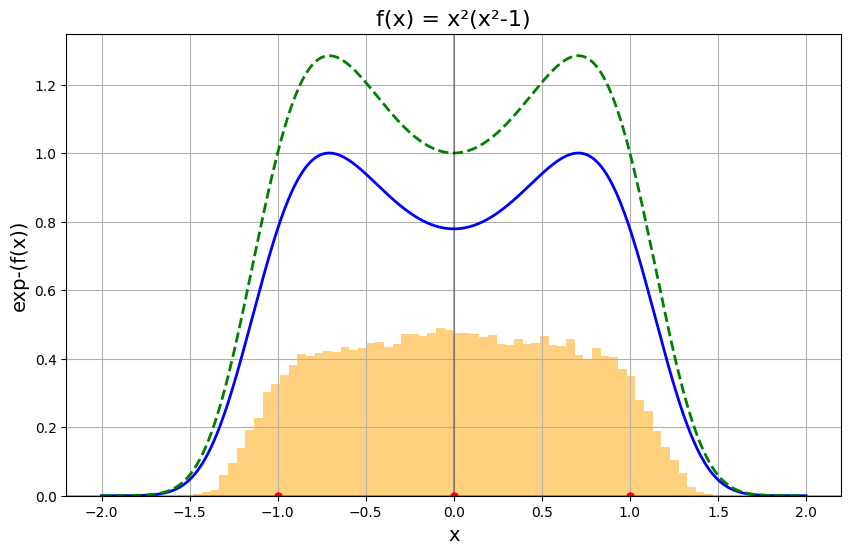

In [78]:
# run the MALA
initial_x = 0.5
n_samples = 100000
sigma = 0.998

samples, acceptance_rate = metropolis_adjusted_langevin_algorithm(potential_function, initial_x, n_samples, sigma)

print(f"Acceptance Rate: {acceptance_rate:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('exp-(f(x))', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2697/2257105102.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(range(n_samples + burn_in))


  0%|          | 0/110000 [00:00<?, ?it/s]

Acceptance Rate: 0.5951


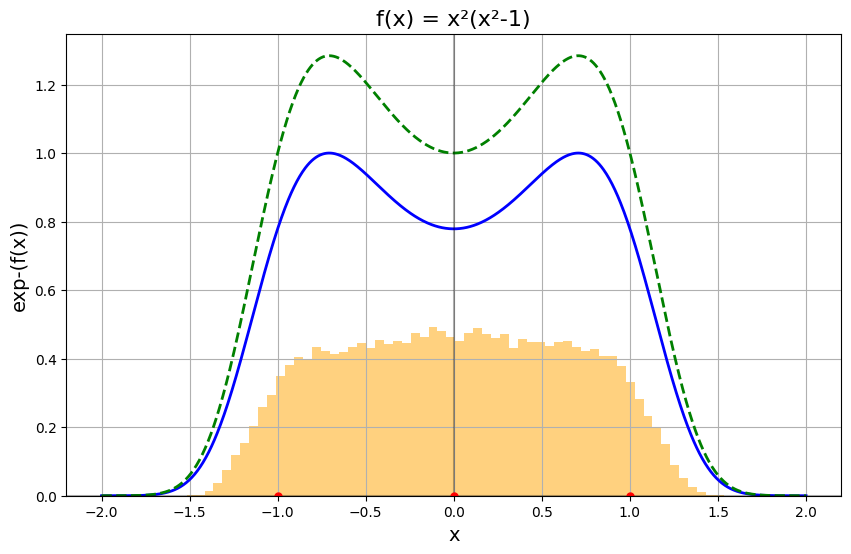

In [79]:
# run the MALA
initial_x = -0.01
n_samples = 100000
sigma = 0.998

samples, acceptance_rate = metropolis_adjusted_langevin_algorithm(potential_function, initial_x, n_samples, sigma)

print(f"Acceptance Rate: {acceptance_rate:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('exp-(f(x))', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

Initial point as $x_0 = -0.5$ \
sigma size $\gamma = 0.1$ 

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2697/2257105102.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(range(n_samples + burn_in))


  0%|          | 0/110000 [00:00<?, ?it/s]

Acceptance Rate: 1.0000


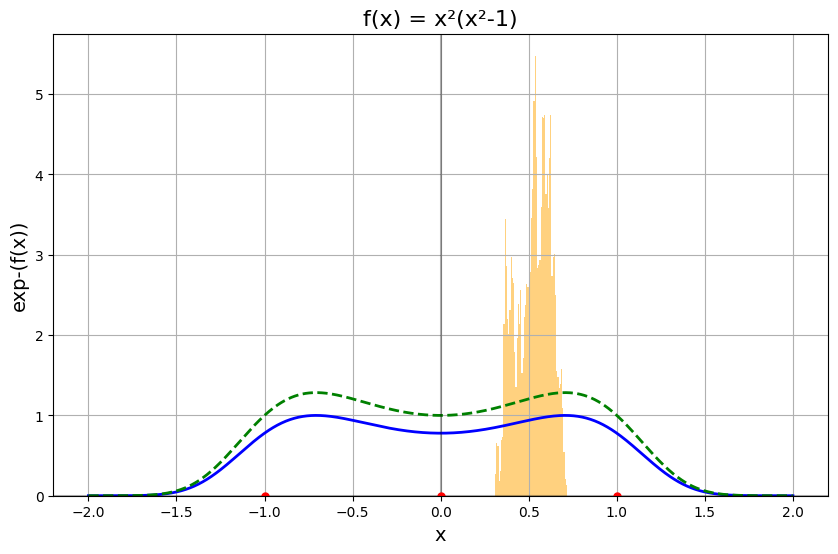

In [83]:
# run the MALA
initial_x = 0.5
n_samples = 100000
sigma = 0.001

samples, acceptance_rate = metropolis_adjusted_langevin_algorithm(potential_function, initial_x, n_samples, sigma)

print(f"Acceptance Rate: {acceptance_rate:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('exp-(f(x))', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

Initial point as $x_0 = 0.5$ \
sigma size $\gamma = 0.3$ 

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2697/4232479298.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(range(n_samples + burn_in))


  0%|          | 0/110000 [00:00<?, ?it/s]

Acceptance Rate: 0.8817


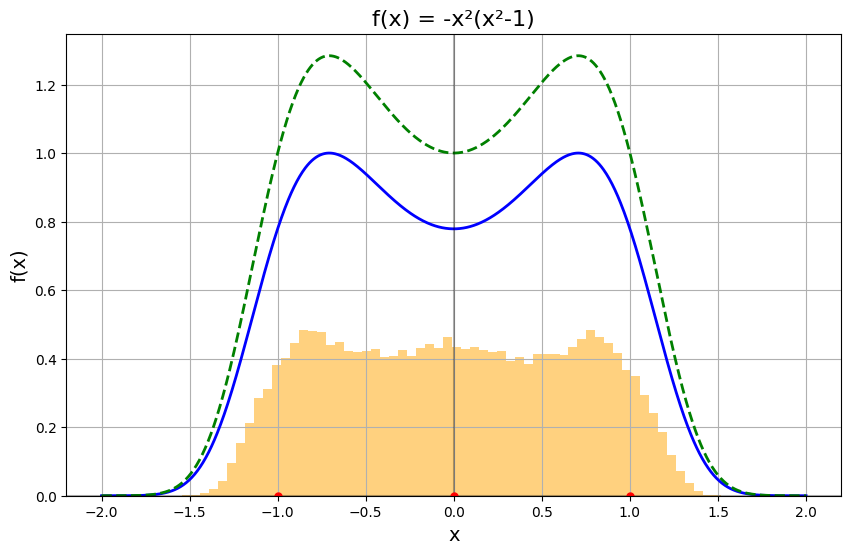

In [ ]:
# run the MALA
initial_x = 0.5
n_samples = 100000
sigma = 0.3

samples, acceptance_rate = metropolis_adjusted_langevin_algorithm(potential_function, initial_x, n_samples, sigma)

print(f"Acceptance Rate: {acceptance_rate:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = -x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('exp-(f(x))', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_2697/4232479298.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  pbar = tqdm(range(n_samples + burn_in))


  0%|          | 0/110000 [00:00<?, ?it/s]

Acceptance Rate: 0.8123


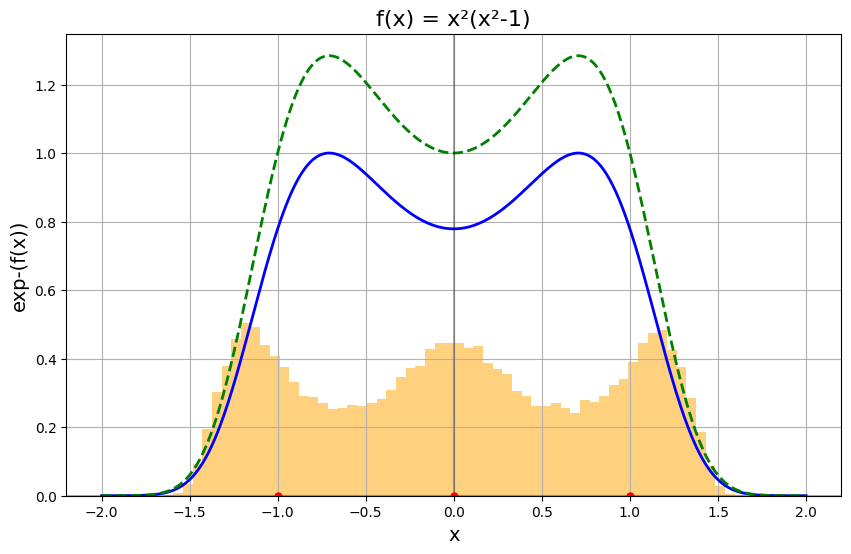

In [ ]:
# run the MALA
initial_x = 0.5
n_samples = 100000
sigma = 0.18

samples, acceptance_rate = metropolis_adjusted_langevin_algorithm(potential_function, initial_x, n_samples, sigma)

print(f"Acceptance Rate: {acceptance_rate:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('exp-(f(x))', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()